# Problem 4 (5 points)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import mode
from sklearn.linear_model import LogisticRegression

# One-vs-One Multinomial Classification

## Load Dataset
#### (Don't edit this)
- (x,y) values are stored in rows of `xy`
- class values are in `c`

In [2]:
x = np.array([7.4881350392732475,16.351893663724194,22.427633760716436,29.04883182996897,35.03654799338904,44.45894113066656,6.375872112626925,18.117730007820796,26.036627605010292,27.434415188257777,38.71725038082664,43.28894919752904,7.680445610939323,18.45596638292661,17.110360581978867,24.47129299701541,31.002183974403255,46.32619845547938,9.781567509498505,17.90012148246819,26.186183422327638,31.59158564216724,35.41479362252932,45.805291762864556,3.182744258689332,15.599210213275237,17.833532874090462,33.04668917049584,36.018483217500716,42.146619399905234,4.64555612104627,16.942336894342166,20.961503322165484,29.284339488686488,30.98789800436355,44.17635497075877,])
y = np.array([0.11120957227224215,0.1116933996874757,0.14437480785146242,0.11818202991034835,0.0859507900573786,0.09370319537993416,0.2797631195927265,0.216022547162927,0.27667667154456677,0.27706378696181594,0.2310382561073841,0.22289262976548535,0.40154283509241845,0.4063710770942623,0.427019677041788,0.41386015134623205,0.46883738380592266,0.38020448107480287,0.5508876756094834,0.5461309517884996,0.5953108325465398,0.5553291602539782,0.5766310772856306,0.5544425592001603,0.705896958364552,0.7010375141164304,0.7556329589465274,0.7038182951348614,0.7096582361680054,0.7268725170660963,0.9320993229847936,0.8597101275793062,0.9337944907498804,0.8596098407893963,0.9476459465013396,0.8968651201647702,])
xy = np.vstack([x,y]).T
c = np.array([0,2,2,2,2,2,0,2,2,2,2,2,0,0,2,0,1,2,0,0,1,1,1,2,0,1,0,1,1,1,0,0,1,1,1,1,])

## Binomial classification function

You are given a function that performs binomial classification by using sklearn's `LogisticRegression` tool:
`classify = get_binomial_classifier(xy, c, A, B)`

To use it, input:
- `xy`, an array in which each row contains (x,y) coordinates of data points
- `c`, an array that specifies the class each point in `xy` belongs to
- `A`, the class of the first group (0, 1, or 2 in this problem)
- `B`, the class of the second group (0, 1, or 2 in this problem), but different from `A`

The function outputs a classifier function (`classify()` in this case), used to classify any new `xy` into group A or B, such as by using `classify(xy)`.

In [3]:
def get_binomial_classifier(xy, c, A, B):
    assert A != B
    xyA, xyB = xy[c==A], xy[c==B]
    cA, cB = c[c==A], c[c==B]
    model = LogisticRegression()
    xy_new = np.concatenate([xyA, xyB], 0)
    c_new = np.concatenate([cA, cB], 0)
    model.fit(xy_new,c_new)

    def classify(xy):
        pred = model.predict(xy)
        return pred
    
    return classify


## Coding a 1v1 classifier

Now you will create a one-vs-one classifier to do multinomial classification. This will generate binomial classifiers for each pair of classes in the dataset. Then to predict the class of a new point, classify it using each of the binomial classifiers, and select the majority winner as the class prediction.

Complete the two functions we have started:
- `generate_all_classifiers(xy, c)` which returns a list of binary classifier functions for all possible pairs of classes (among 0, 1, and 2 in this problem)
- `classify_majority(classifiers, xy)` which loops through a list of classifiers and gets their predictions for each point in `xy`. Then using a majority voting scheme at each point, return the overall class predictions for each point.


In [4]:
import itertools
import scipy.stats
def generate_all_classifiers(xy, c):
    # YOUR CODE GOES HERE
    # Use get_binomial_classifier() to get binomial classifiers for each pair of classes,
    # and return a list of these classifiers
    # There are total n+1 combinations for n multivariable classification problem
    
    classes = np.unique(c)

    # Save classifiers in a list 
    classifiers = []

    # Generate all combinations
    combinations = [combs for combs in itertools.combinations(classes, 2)]
    print(combinations)
    
    for com in combinations:
        print(com)
        model = get_binomial_classifier(xy, c, A = com[0], B = com[1])
        classifiers.append(model)

    return classifiers

def classify_majority(classifiers, xy):
    # YOUR CODE GOES HERE
    results = []
    for items in classifiers:
        model = items
        predict = model(xy)
        results.append(predict)
    mode = scipy.stats.mode(np.array(results), axis = 0)
    classes = mode.mode
    return classes


### Trying out our multinomial classifier:

In [5]:
classifiers = generate_all_classifiers(xy, c)
preds = classify_majority(classifiers, xy)
accuracy = np.sum(preds == c) / len(c) * 100
print("True Classes:", c)
print(" Predictions:", preds)
print("    Accuracy:", accuracy, r"%")

[(0, 1), (0, 2), (1, 2)]
(0, 1)
(0, 2)
(1, 2)
True Classes: [0 2 2 2 2 2 0 2 2 2 2 2 0 0 2 0 1 2 0 0 1 1 1 2 0 1 0 1 1 1 0 0 1 1 1 1]
 Predictions: [0 0 2 2 2 2 0 0 2 2 2 2 0 0 0 2 2 2 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1]
    Accuracy: 80.55555555555556 %


### Plotting a Decision Boundary

Here, we have made some plotting functions -- run these cells to visualize the decision boundaries.

In [6]:
def plot_data(x, y, c, title="Phase of simulated material", newfig=True):
    xlim = [0,52.5]
    ylim = [0,1.05]
    markers = [dict(marker="o", color="royalblue"), dict(marker="s", color="crimson"), dict(marker="^", color="limegreen")]
    labels = ["Solid", "Liquid", "Vapor"]

    if newfig:
        plt.figure(dpi=150)

    for i in range(1+max(c)):
        plt.scatter(x[c==i], y[c==i], s=60, **(markers[i]), edgecolor="black", linewidths=0.4,label=labels[i])

    plt.title(title)
    plt.legend(loc="upper right")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Temperature, K")
    plt.ylabel("Pressure, atm")
    plt.box(True)

def plot_colors(classifiers, res=40):
    xlim = [0,52.5]
    ylim = [0,1.05]
    xvals = np.linspace(*xlim,res)
    yvals = np.linspace(*ylim,res)
    x,y = np.meshgrid(xvals,yvals)
    XY = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
    if type(classifiers) == list:
        color = classify_majority(classifiers,XY).reshape(res,res)
    else:
        color = classifiers(XY).reshape(res,res)
    cmap = ListedColormap(["lightblue","lightcoral","palegreen"])
    plt.pcolor(x, y, color, shading="nearest", zorder=-1, cmap=cmap,vmin=0,vmax=2)
    return


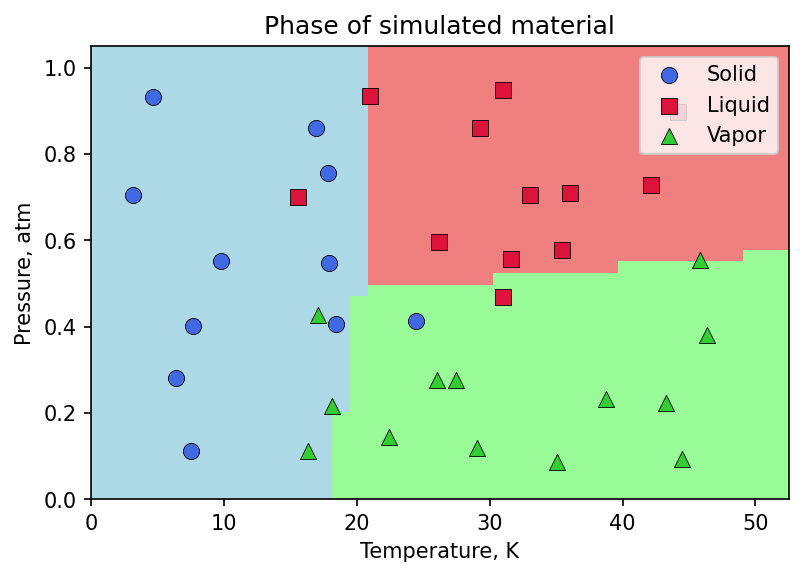

In [7]:
# Convert classifiers to list 

plot_data(x,y,c)
plot_colors(classifiers)
plt.show()

##### We can also look at the results of each binary classifier:

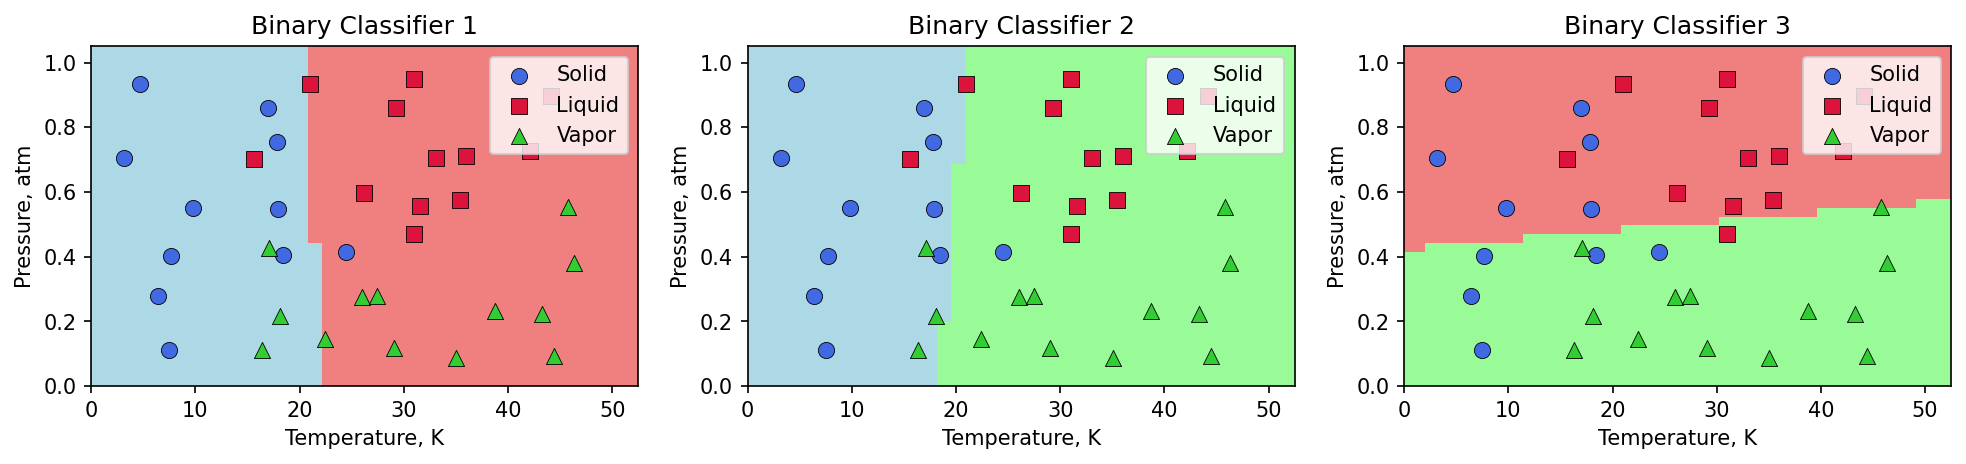

In [8]:
plt.figure(figsize=(16,3),dpi=150)
for i in range(3):
    plt.subplot(1,3,i+1)
    plot_data(x, y, c, title=f"Binary Classifier {i+1}", newfig=False)
    plot_colors(classifiers[i])
plt.show()